# Testing our OMP code base
Just some basic unit testing to make sure things are working

In [1]:
import numpy as np
import scipy as sp
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
import pdb

import omp

importlib.reload(omp)

%matplotlib inline

### Just make sure our raw arithmetic is implemented right

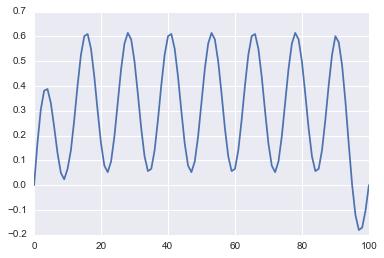

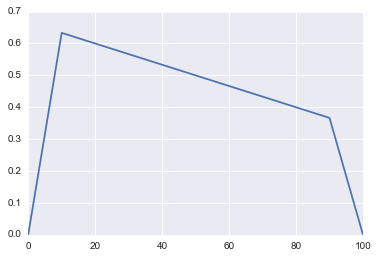

In [2]:
v = omp.Vector([[0.1, 0.9],[16]], [[1, 1],[10]], ['H1delta', 'H1sin'])
xs = np.arange(0,1.01,0.01)

plt.plot(v.evaluate(xs))
plt.show()

v1 = omp.Vector([[0.1]], [[1]], ['H1delta'])
v2 = omp.Vector([[0.9]], [[1]], ['H1delta'])

v3 = 2*v1 + 1*v2

plt.plot(v3.evaluate(xs))
plt.show()

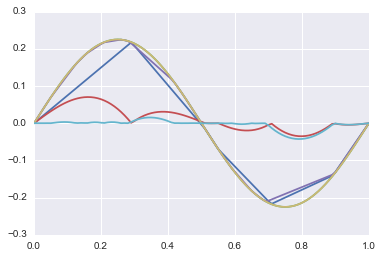

|| v ||	 1.0
||v_W_c||	 0.9159564625124856
||v_W_f||	 0.9691403856312073
||v - v_W_c||	 0.4012776579646746
||v - v_W_f||	 0.2465094581118446
<v_W_c, v_W_c>	 0.838976241218
<v_W_c, v_W_c> equivalent 0.838976241218
<v_W_f, v_W_f>	 0.939233087061
<v_W_f, v_W_f> equivalent 0.939233087061


In [3]:
importlib.reload(omp)

np.random.seed(3)
n_c = 5
n_f = 20
W_c = omp.make_random_delta_basis(n_c)
W_f = omp.make_random_delta_basis(n_f)

v = omp.Vector([2],[1],['H1sin'])

v_W_c = W_c.project(v)
v_W_f = W_f.project(v)

#print(W.G)
plt.plot(xs, v_W_c.evaluate(xs))
plt.plot(xs, v.evaluate(xs))
plt.plot(xs, (v-v_W_c).evaluate(xs))
plt.plot(xs, v_W_f.evaluate(xs))
plt.plot(xs, v.evaluate(xs))
plt.plot(xs, (v-v_W_f).evaluate(xs))
plt.show()

print('|| v ||\t', v.norm())

print('||v_W_c||\t', v_W_c.norm())
print('||v_W_f||\t', v_W_f.norm())

print('||v - v_W_c||\t', (v - v_W_c).norm())
print('||v - v_W_f||\t', (v - v_W_f).norm())

print('<v_W_c, v_W_c>\t', v_W_c.dot(v_W_c))
print('<v_W_c, v_W_c> equivalent', (v_W_c.coeffs[0] * v.evaluate(v_W_c.params[0]) / np.sqrt(v_W_c.params[0] * (1 - v_W_c.params[0])) ).sum())
print('<v_W_f, v_W_f>\t', v_W_f.dot(v_W_f))
print('<v_W_f, v_W_f> equivalent', (v_W_f.coeffs[0] * v.evaluate(v_W_f.params[0]) / np.sqrt(v_W_f.params[0] * (1 - v_W_f.params[0])) ).sum())

## So the basic mechanisms of the algorithm work, now to do some actual basis work
We start by looking at the orthonomalised basis and make sure things look right

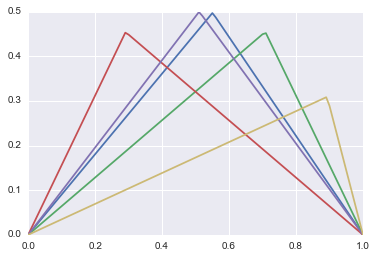

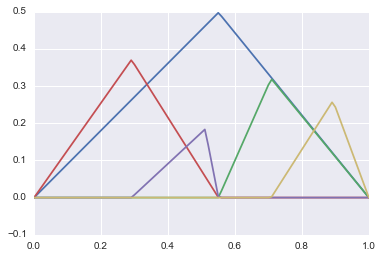

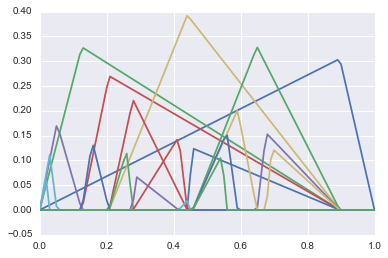

In [4]:
W_c_o = W_c.orthonormalise()
W_f_o = W_f.orthonormalise()

for vec in W_c.vecs:
    plt.plot(xs, vec.evaluate(xs))
plt.show()

for vec in W_c_o.vecs:
    plt.plot(xs, vec.evaluate(xs))
plt.show()

for vec in W_f_o.vecs:
    plt.plot(xs, vec.evaluate(xs))
plt.show()

### ...Well that looks about right. Now lets make a sinusoid basis, favourable basis pair, and check out the results

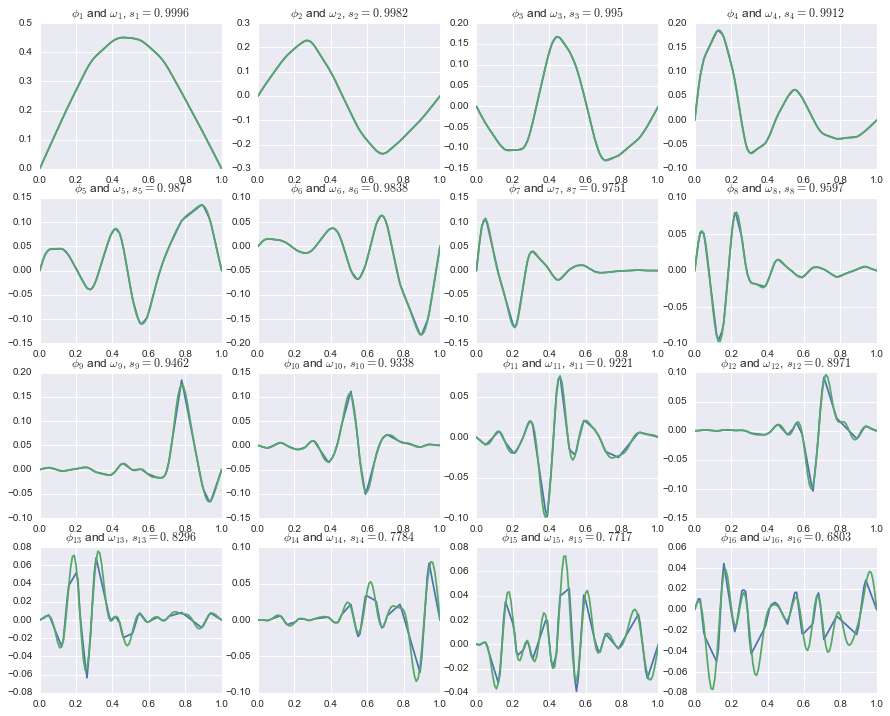

In [5]:
importlib.reload(omp)

np.random.seed(3)
n = 20
m = 30
Wm = omp.make_random_delta_basis(m)
Vn = omp.make_sin_basis(n)

Wm = Wm.orthonormalise()

BP = omp.BasisPair(Wm, Vn)
FB = BP.make_favorable_basis()

fig = plt.figure
fig = plt.figure(figsize=(15, 12))

for i in range(16):
    ax = fig.add_subplot(4, 4, i+1)
    ax.plot(xs, FB.Wm.vecs[i].evaluate(xs))
    ax.plot(xs, FB.Vn.vecs[i].evaluate(xs))
    ax.set(title=r'$\phi_{{{0}}}$ and $\omega_{{{1}}}$, $s_{{{2}}}={{{3:0.4}}}$'.format(i+1, i+1, i+1, FB.S[i]))

### Great, favorable basis code works. Now for some tests with the greedy algorithm.

In [11]:
importlib.reload(omp)

N = 1e4
dictionary = omp.make_unif_dictionary(N)

np.random.seed(3)
n = 20
m = 30
Vn = omp.make_sin_basis(n)

gbc = omp.GreedyBasisConstructor(m, dictionary, Vn)

Wm = gbc.construct_basis()

So where are the points? Have we got some heirarchical sort of system, perhaps following a dyadic grid. Hopefully we do!

In [12]:
for i in range(m):
    print('{0}:\t {1}'.format(i,Wm.vecs[i].params[0]))

0:	 [ 0.47605239]
1:	 [ 0.01909809]
2:	 [ 0.98160184]
3:	 [ 0.92810719]
4:	 [ 0.07109289]
5:	 [ 0.12328767]
6:	 [ 0.87771223]
7:	 [ 0.82611739]
8:	 [ 0.17258274]
9:	 [ 0.22417758]
10:	 [ 0.77712229]
11:	 [ 0.72552745]
12:	 [ 0.27247275]
13:	 [ 0.32456754]
14:	 [ 0.67733227]
15:	 [ 0.62523748]
16:	 [ 0.37146285]
17:	 [ 0.42485751]
18:	 [ 0.57854215]
19:	 [ 0.52494751]
20:	 [ 0.96750325]
21:	 [ 0.03289671]
22:	 [ 0.08459154]
23:	 [ 0.91490851]
24:	 [ 0.00839916]
25:	 [ 0.99190081]
26:	 [ 0.86481352]
27:	 [ 0.13578642]
28:	 [ 0.18528147]
29:	 [ 0.93920608]


In [ ]:
print([d.params[0][0] for d in dictionary])